## **Red convolucional de clasificación de gatos y perros.**

## Carga de librerías.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2 #open cv para procesamiento de imagenes

## Carga de dataset desde TensorFlow.

In [ ]:
cat_dog_data, info_cd = tfds.load(name='cats_vs_dogs', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.6SRUJH_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


## Detalles del contenido del dataset.

In [ ]:
info_cd

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

## Imágenes de ejemplo.

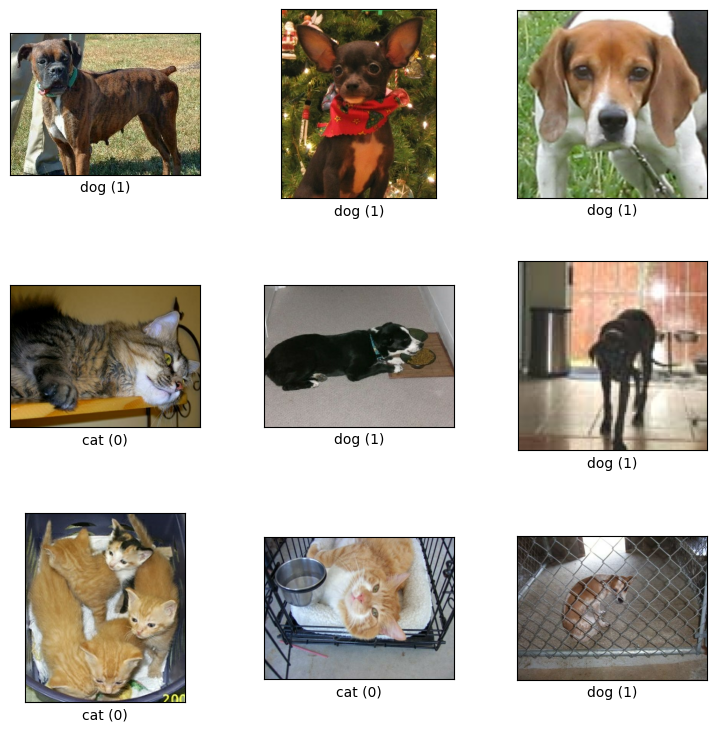

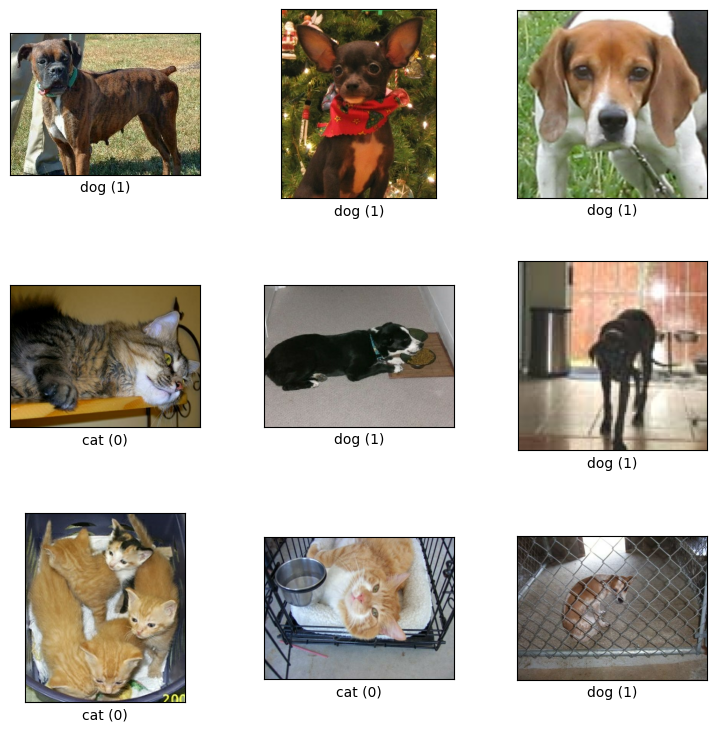

In [ ]:
tfds.show_examples(cat_dog_data['train'], info_cd)

## Imágenes de ejemplo con medidas en pixeles.

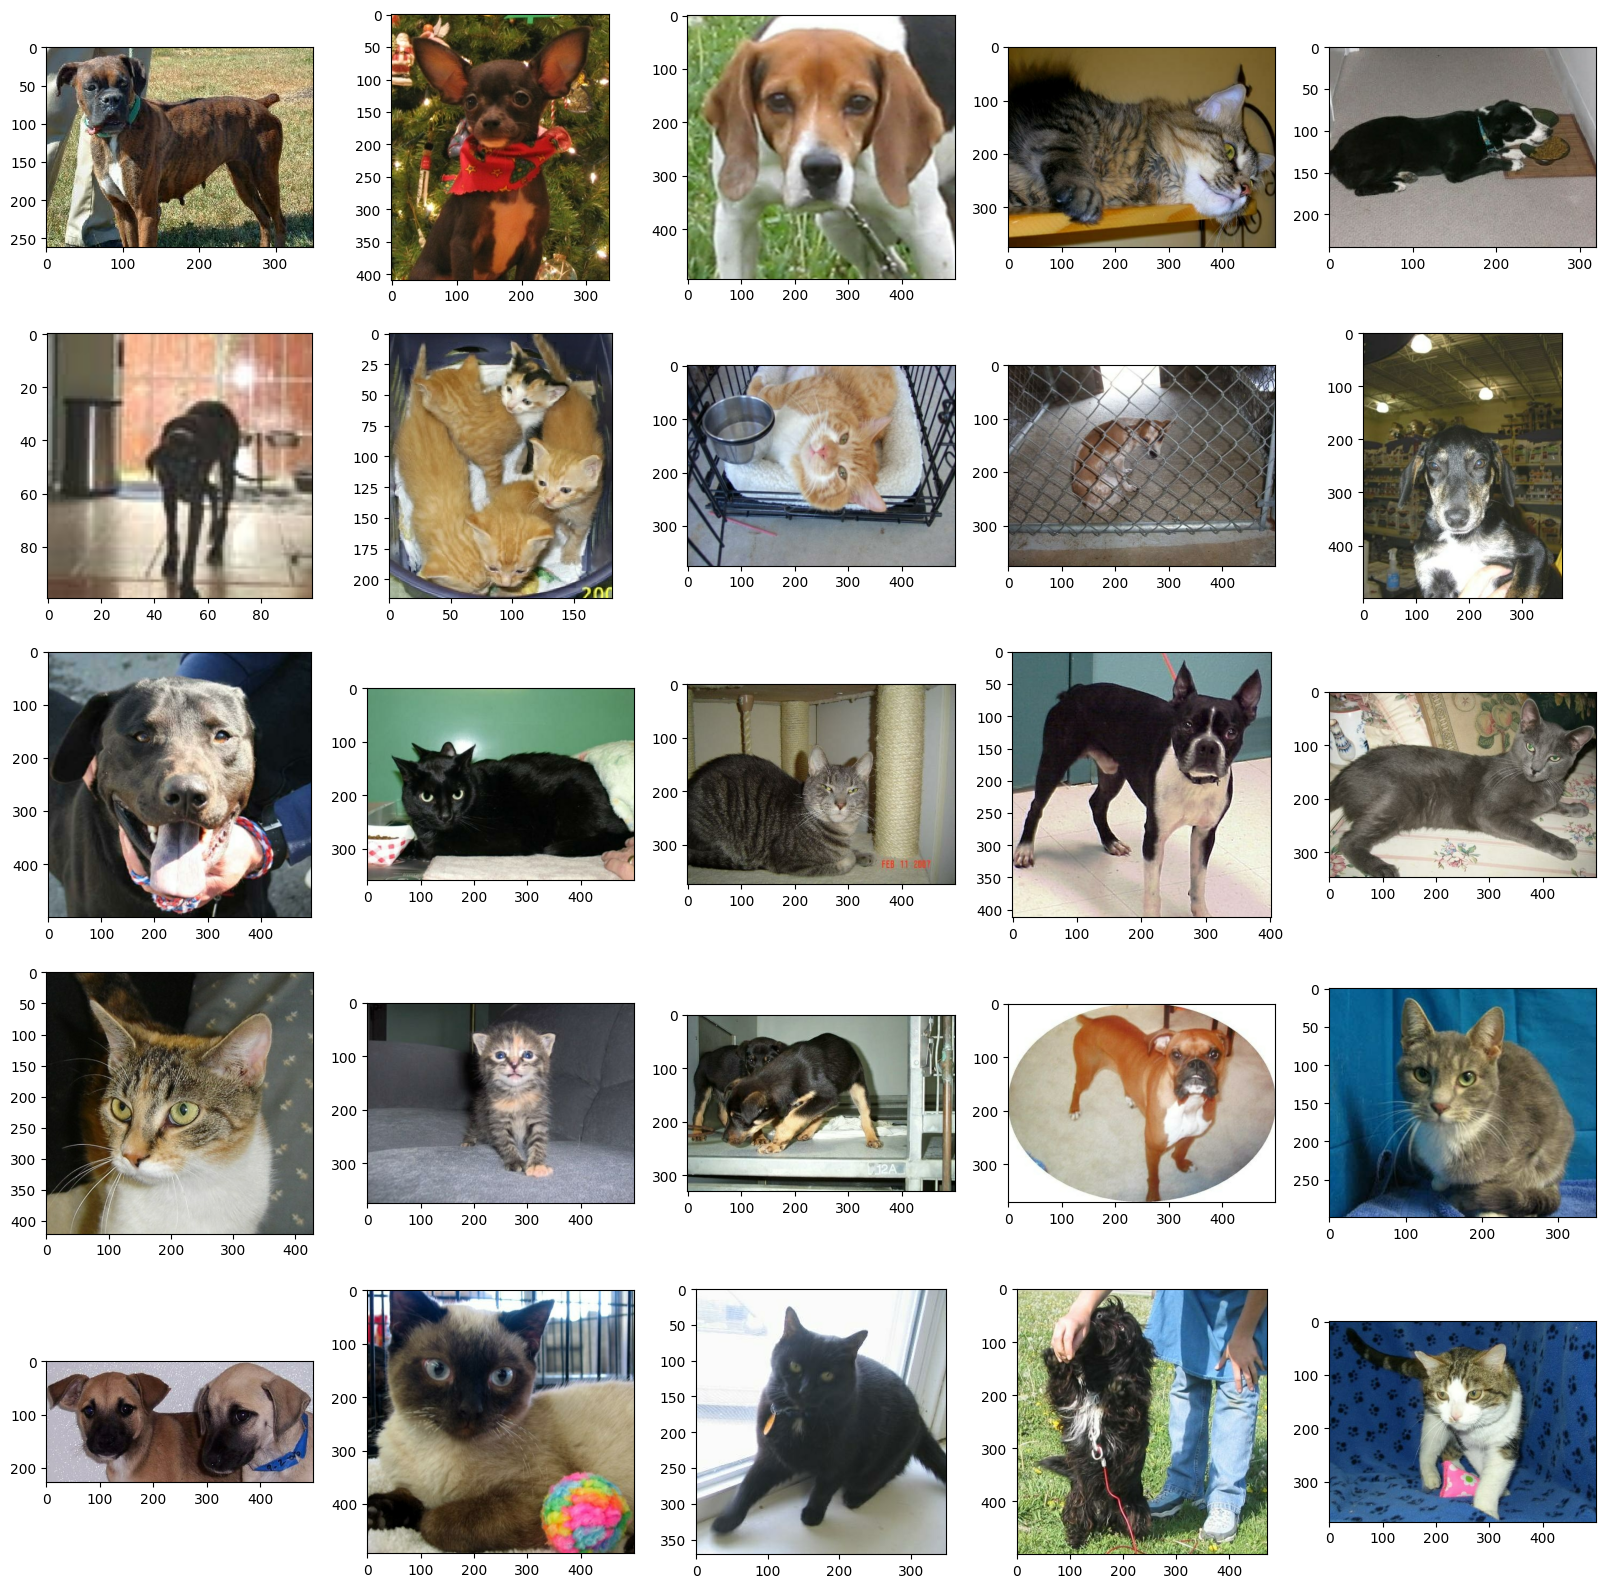

In [ ]:
plt.figure(figsize=(20,20))

for ind, (image, label) in enumerate(cat_dog_data['train'].take(25)):
    plt.subplot(5,5,ind+1)
    plt.imshow(image)

## Cambiar tamaño de las imágenes a 100 x 100 pixeles y pasarlas a escala de grises.

### Imágenes de prueba del cambio.

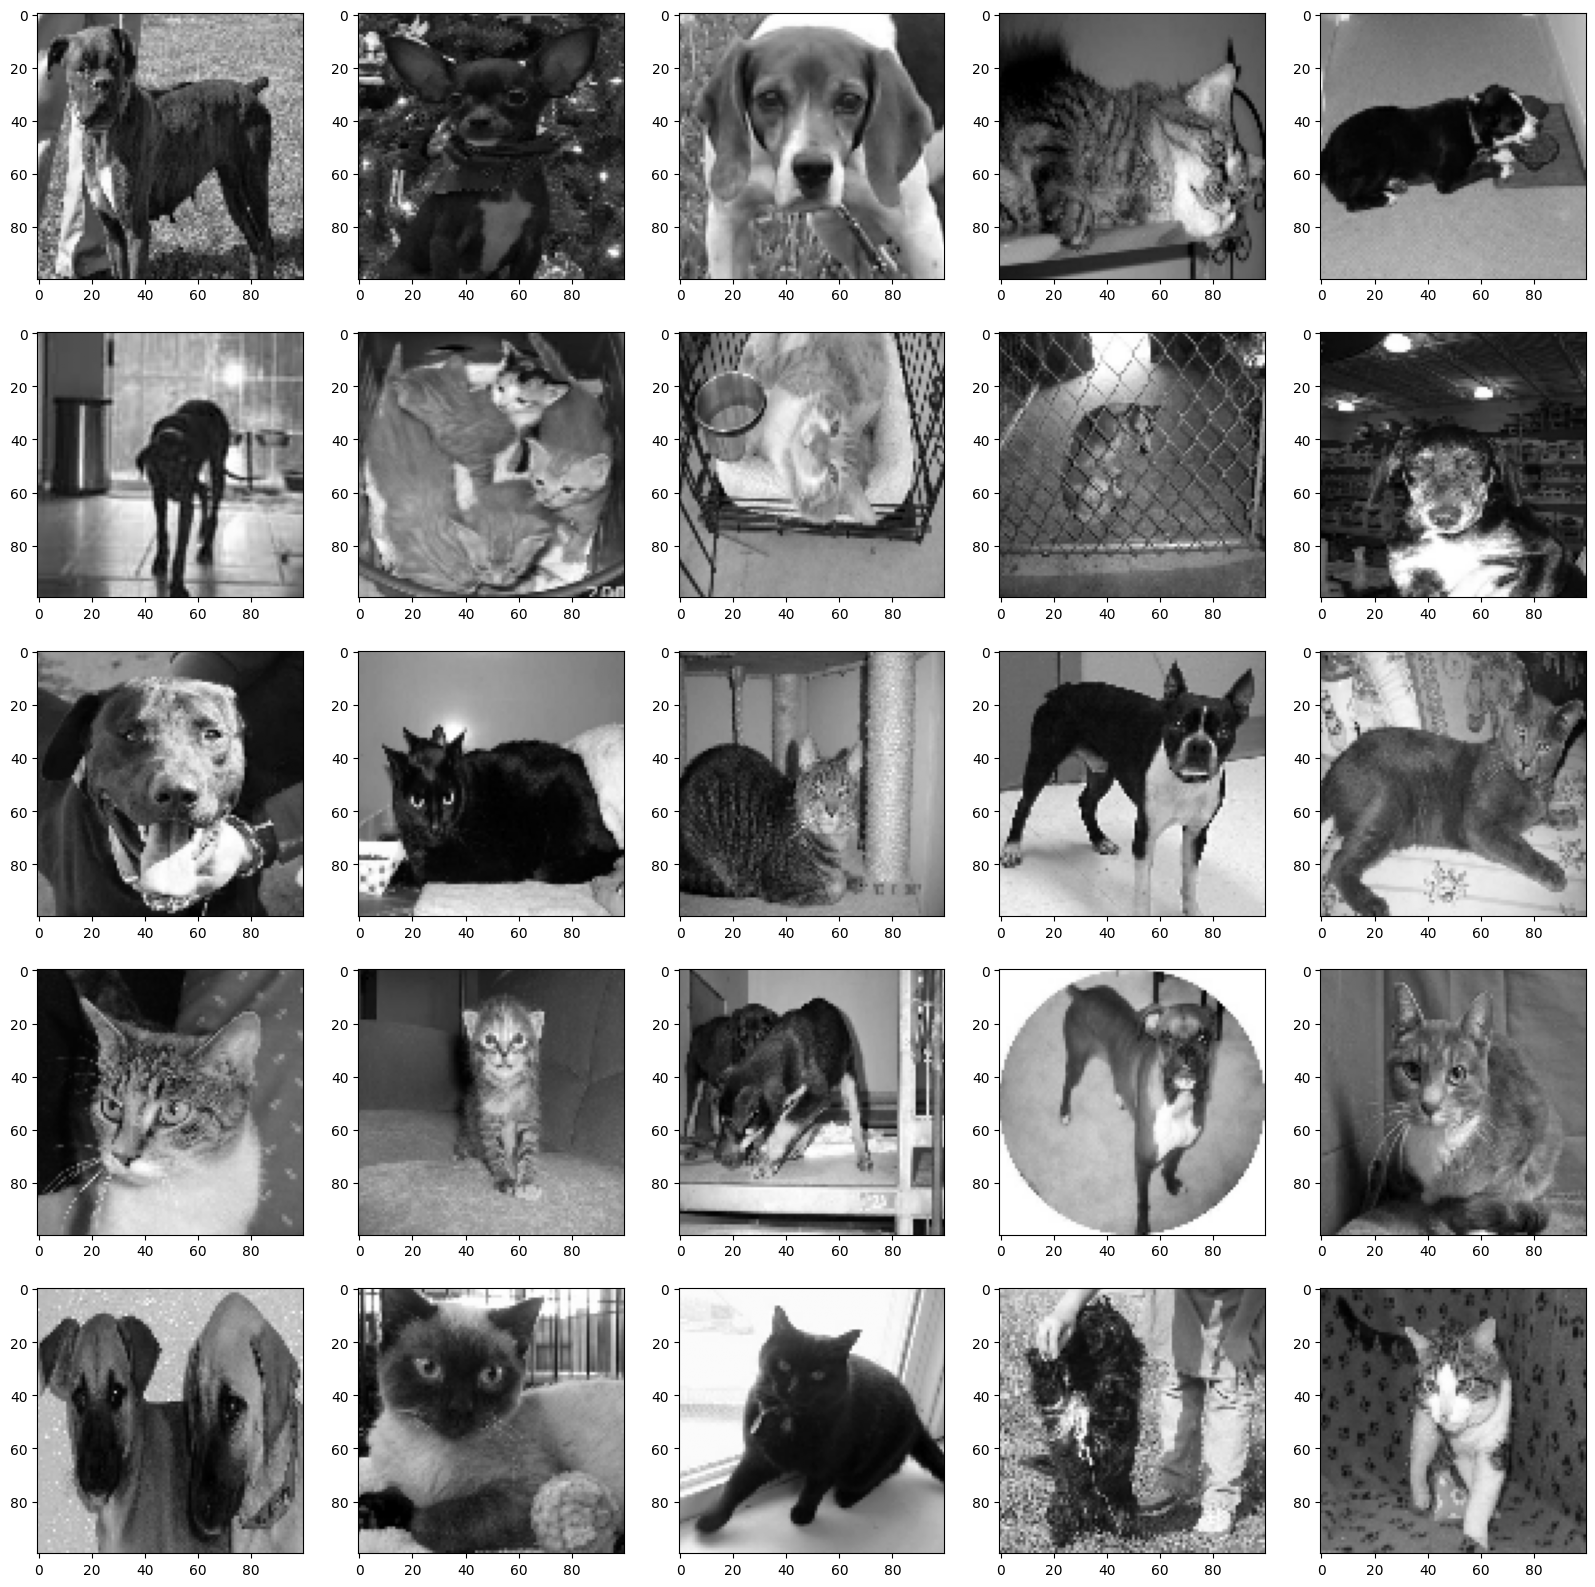

In [ ]:
size_img = 100

plt.figure(figsize=(20,20))

for ind, (image, label) in enumerate(cat_dog_data['train'].take(25)):
    image = cv2.resize(image.numpy(), (size_img, size_img))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(5,5,ind+1)
    plt.imshow(image, cmap='gray') #cmap=plt.cm.binary
    #plt.xticks([])
    #plt.yticks([])

    #plt.text(2,4, name_classes[label], fontdict={'fontsize': 12})
    #plt.grid(False)

#plt.show()

### Modificación de las imágenes.

In [ ]:
cat_dog_train = []
for ind, (image, label) in enumerate(cat_dog_data['train']):
    image = cv2.resize(image.numpy(), (size_img, size_img))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(size_img, size_img, 1)
    cat_dog_train.append([image, label])

In [ ]:
len(cat_dog_train)

23262

## Separar las imágenes y las etiquetas en diferentes lista para implementar entrenamiento supervisado.

In [ ]:
# Preparar variables

X = []
y = []

for image, label in cat_dog_train:
    X.append(image)
    y.append(label)

In [ ]:
# Normalizar imagenes.

X = np.array(X).astype(float) / 255

# Codificar etiquetas sustituyendo el tensor por la categoría, 0 para gato y 1 para perro.

y = np.array(y)

## Diseño de la arquitectura de la red.

In [ ]:
model_cat_dog = tf.keras.models.Sequential([
    # Capa de entrada
    tf.keras.layers.Input(shape=(100, 100, 1)),
    # Capa de convolución
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(size_img, size_img, 1)),
    # Capa de agrupación
    tf.keras.layers.MaxPooling2D(2, 2),
    # Capa de convolución
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    # Capa de agrupación
    tf.keras.layers.MaxPooling2D(2, 2),
    # Capa de convolución
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    # Capa de agrupación
    tf.keras.layers.MaxPooling2D(2, 2),

    # Salida binaria
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

In [ ]:
model_cat_dog.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_cat_dog.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,193,989 (19.81 MB)

 Trainable params: 1,731,329 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,462,660 (13.21 MB)

## Entrenamiento con datos de validación del 20%.

In [ ]:
history = model_cat_dog.fit(X, y, batch_size = 32, validation_split = 0.2, epochs = 50)

Epoch 1/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5852 - loss: 0.6605 - val_accuracy: 0.7623 - val_loss: 0.5048
Epoch 2/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7549 - loss: 0.5054 - val_accuracy: 0.8044 - val_loss: 0.4269
Epoch 3/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8061 - loss: 0.4201 - val_accuracy: 0.8162 - val_loss: 0.3999
Epoch 4/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8397 - loss: 0.3645 - val_accuracy: 0.8386 - val_loss: 0.3740
Epoch 5/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8672 - loss: 0.3104 - val_accuracy: 0.8476 - val_loss: 0.3589
Epoch 6/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8936 - loss: 0.2578 - val_accuracy: 0.8493 - val_loss: 0.3526
Epoch 7/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9166 - loss: 0.2104 - val_accuracy: 0.8491 - val_loss: 0.3780
Epoch 8/50
582/582 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9383 - loss: 0.1621 - val_ac

## Funciones para graficar precisión y pérdida.

In [ ]:
# Gráfico de precisión
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión en validación')
    plt.title('Precisión durante el entrenamiento')
    plt.xlim(0, len(history.history['accuracy']))
    plt.ylim(0.8, 1)
    plt.xticks(np.arange(0, len(history.history['accuracy']), step=2))
    plt.yticks(np.arange(0.8, 1.01, step=0.01))
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
# Gráfico de pérdida
def plot_loss(history):
  plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
  plt.plot(history.history['val_loss'], label='Pérdida en validación')
  plt.title('Pérdida durante el entrenamiento')
  plt.xlim(0, len(history.history['loss']))
  plt.ylim(0, 2)
  plt.xticks(np.arange(0, len(history.history['loss']), step=2))
  plt.yticks(np.arange(0, 2, step=0.1))
  plt.xlabel('Época')
  plt.ylabel('Pérdida')
  plt.grid(True)
  plt.legend()
  plt.show()

##

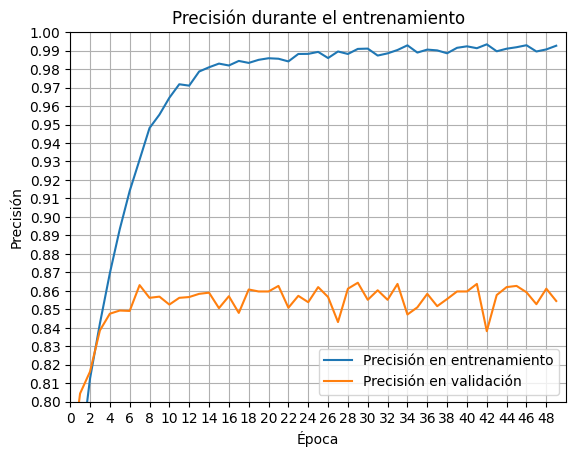

In [ ]:
plot_accuracy(history)

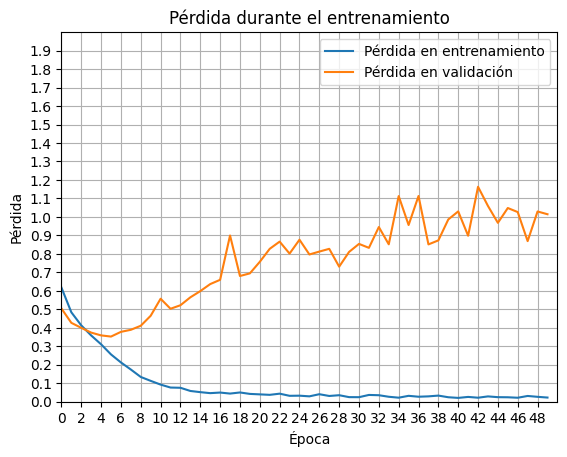

In [ ]:
plot_loss(model_cat_dog.history)

## Predicciones.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1.]]
[0]
Cat


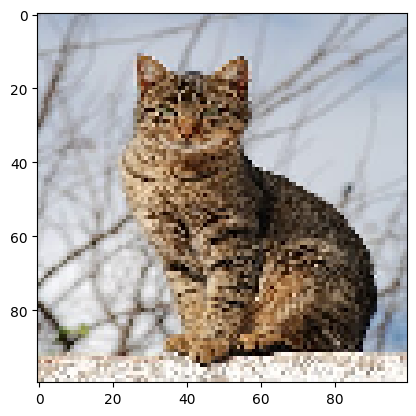

In [ ]:
# Etiqueta de clases.
classes = {0:"Cat", 1:'Dog'}

# Cargar y procesar imagen.
image_path = '/content/sample_data/img_November_2010-1a.jpg'
new_img = image.load_img(image_path, target_size = (size_img, size_img))
img = image.img_to_array(new_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.reshape(size_img, size_img, 1)
img = np.expand_dims(img, axis = 0) # Agregar dimensión

# Hacer predicción.
prediction = model_cat_dog.predict(img)
print(prediction)

# Obtener la clase predicha.
prediction = np.argmax(prediction, axis = 1)
print(prediction)
print(classes[prediction[0]])

# Mostrar imagen.
plt.imshow(new_img)
plt.show()